In [134]:
from skimage.color import rgb2gray
import skimage.transform as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import skimage.exposure

In [135]:
plt.gray() # makes image plots grayscale

# make images grayscale (size 2)
lena = rgb2gray(imread('lena.tiff')) *255
cameraman = imread('cameraman.tif').astype(np.float64)
# scales image to the range of [0.0,1.0] by dividing by 255.0
tire = imread('tire.tif').astype(np.float64) / 255.0


<Figure size 640x480 with 0 Axes>

In [136]:
def PSNR(f, g):
    f = f.astype(np.float64)
    g = g.astype(np.float64)
    max_f = 255.0

    MSE = np.sum(np.square(f - g)) / (f.shape[0] * f.shape[1])
    PSNR_out = 10*np.log10((max_f**2)/MSE)
    return PSNR_out


In [137]:
lena.shape, cameraman.shape, tire.shape

((512, 512), (256, 256), (205, 232))

In [138]:
# interpolation
def interpolation(image, factor, order, ax, operation):
    new_shape = (image.shape[0] * factor, image.shape[1] * factor)
    print(f'{operation} interpolation -> old shape:', {image.shape}, 'new shape:', {new_shape})
    interpolated = tf.resize(image, output_shape=new_shape, order=order, mode='symmetric')
    ax.imshow(interpolated)
    print(interpolated.shape)
    return interpolated


bilinear interpolation -> old shape: {(512, 512)} new shape: {(128.0, 128.0)}
(128, 128)
bilinear interpolation -> old shape: {(256, 256)} new shape: {(64.0, 64.0)}
(64, 64)


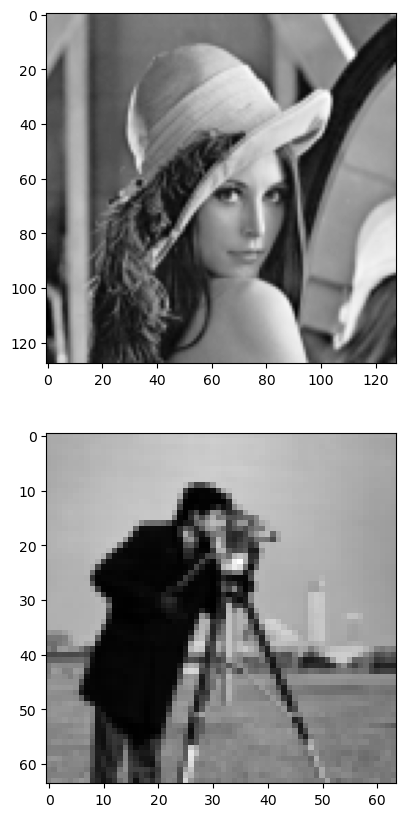

In [139]:
# bilinear
fig, axs = plt.subplots(2, figsize=(10, 10))
lena_reduced = interpolation(lena, (1/4), 1, axs[0], 'bilinear')
cameraman_reduced = interpolation(cameraman, (1/4), 1, axs[1], 'bilinear')

nearest neighbour interpolation -> old shape: {(128, 128)} new shape: {(512, 512)}
(512, 512)
PSNR: 26.41393991771976
bilinear interpolation -> old shape: {(128, 128)} new shape: {(512, 512)}
(512, 512)
PSNR: 27.086119358818863
bicubic interpolation -> old shape: {(128, 128)} new shape: {(512, 512)}
(512, 512)
PSNR: 28.1531604125544


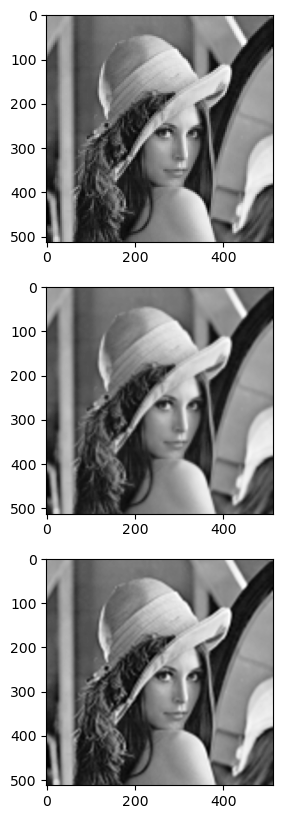

In [140]:
# digital zooming lena
fig, axs = plt.subplots(3, figsize=(10, 10))
for i in range(3):
    order = i
    if i == 0:
        operation = 'nearest neighbour'
    elif i == 1:
        operation = 'bilinear'
    elif i == 2:
        order = 3
        operation = 'bicubic'
    lena_upsampled = interpolation(lena_reduced, 4, order, axs[i], operation)
    psnr_value = PSNR(lena, lena_upsampled)
    print(f'PSNR: {psnr_value}')

nearest neighbour interpolation -> old shape: {(64, 64)} new shape: {(256, 256)}
(256, 256)
PSNR: 21.631635952440508
bilinear interpolation -> old shape: {(64, 64)} new shape: {(256, 256)}
(256, 256)
PSNR: 21.921986102900497
bicubic interpolation -> old shape: {(64, 64)} new shape: {(256, 256)}
(256, 256)
PSNR: 22.511916913866976


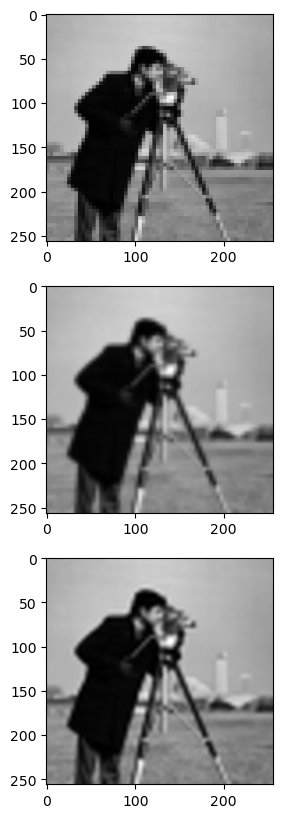

In [141]:
# digital zooming cameraman
fig, axs = plt.subplots(3, figsize=(10, 10))
for i in range(3):
    order = i
    if i == 0:
        operation = 'nearest neighbour'
    elif i == 1:
        operation = 'bilinear'
    elif i == 2:
        order = 3
        operation = 'bicubic'
    cameraman_upsampled = interpolation(cameraman_reduced, 4, order, axs[i], operation)
    psnr_value = PSNR(cameraman, cameraman_upsampled)
    print(f'PSNR: {psnr_value}')

1. What can you observed about the up-sampled images produced by each of the methods?
The upsampled images of Lena look similar whereas those for the cameraman vary.

2. How do the different methods compare to each other in terms of PSNR as well as visual quality? Why?
In terms of PSNR, the zooming methods are relatively similar. The bicubic interpolation produces images of highest quality, followed by bilinear interpolation and then nearest neighbour interpolation. Visually, it is difficult to see the quality difference between each zooming method for Lena, but it is clear that the quality improves for the cameraman based on the order of the interpolation method. 

3. What parts of the image seems to work well using these digital zooming methods? What parts of the image doesn’t? Why?
The nearest neighbour interpolation does well at pixelated effects and keeping sharp edges, but struggles to get fine details and smooth transitions between pixels. In contrast, bilinear works well at smoothing the transitions between pixels, making it good for large areas of consistent, like the sky or grass in the cameraman image. However, bilinear seems to also make images less detailed. Lastly, bicubic 

4. Compare the zooming results between Lena and Cameraman. Which image results in higher PSNR? Which image looks better when restored to the original resolution using digital zooming methods? Why?
The image of Lena results in a higher PSNR, indicating that its upsampled images are of better quality. This is also visually noticeable, as in all three zooming methods for Lena, the image is relatively clear.
However, looking at the upsampled images of the cameraman, we can notice that they're very blurry or pixelated.

5. What does the PSNR tell you about each of the methods? Does it reflect what is observed visually?
As bicubic interpolation leads to the highest PSNR values, we can conclude that it is best at upsampling images in this scenario. This makes sense as it's the most precise method out of the three, taking 16 pixels (4×4) into account. It is also logical that nearest neighbour interpolation is the worst based on the PSNR value, as it selects the value of the nearest point and does not consider the values of neighboring points. We can clearly observe this for the upsampled cameraman images, but it is harder to notice this when observing the upsampled images of Lena.

In [142]:
def tire_plotting(tire_image, image_title, histogram_title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    tire_flattened = tire_image.flatten()
    axs[0].imshow(tire_image)
    axs[1].hist(tire_flattened)
    axs[0].set_title(image_title)
    axs[1].set_title(histogram_title)
    axs[1].set_xlabel("Pixel Intensity (k)")
    axs[1].set_ylabel("Pixel Count (n_k)")

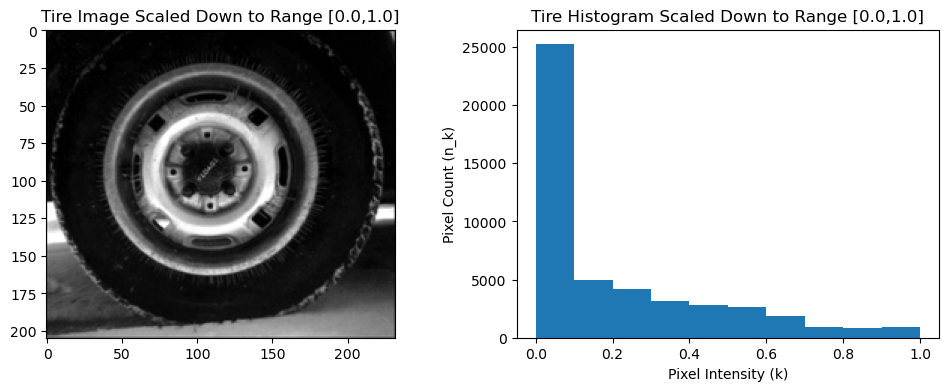

In [143]:
tire_plotting(tire, "Tire Image Scaled Down to Range [0.0,1.0]", "Tire Histogram Scaled Down to Range [0.0,1.0]")

6. Explain what the histogram of an image represents. Why is it useful?
A histogram of a grayscale image represents the distribution of grey levels in an image. It's useful as it enables point processing for enhancement.

7. Describe how the histogram looks like in the context of intensity distribution. What does the histogram
say about the image?
The intensity distribution is right-skewed. The histogram indicates that the image has many dark levels, which is noticeable while observing the image.

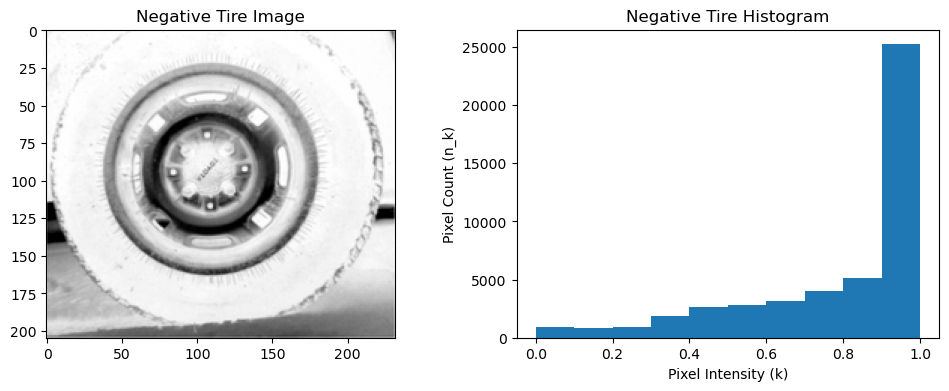

In [144]:
tire_negative = 1.0 - tire
tire_plotting(tire_negative, "Negative Tire Image", "Negative Tire Histogram")

8. Describe how the histogram looks like in the context of intensity distribution. How does it differ from
the histogram of the original image? Why?
The histogram is the opposite of the original image, meaning that the histogram is now left-skewed. This indicates that there is a larger amount of bright pixels in the image. This differs from the original as the negative is produced by subtracting each pixel from the maximum intensity value, 1 - p(k), which is the complimentary probability distribution. Hence, the darkest pixels will become the brightest and vice-versa.

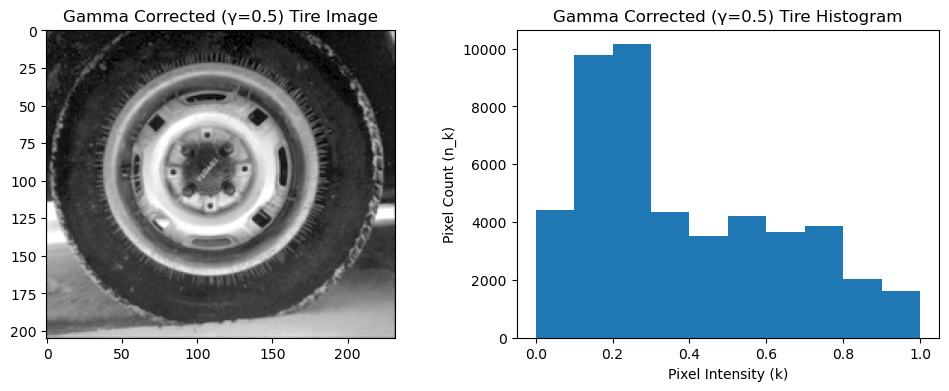

In [145]:
I_out1 = tire ** 0.5
tire_plotting(I_out1, "Gamma Corrected (γ=0.5) Tire Image", "Gamma Corrected (γ=0.5) Tire Histogram")

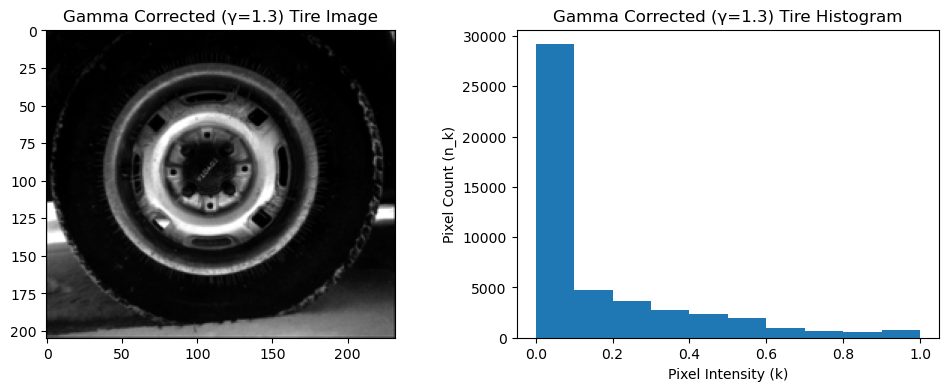

In [146]:
I_out2 = tire ** 1.3
tire_plotting(I_out2, "Gamma Corrected (γ=1.3) Tire Image", "Gamma Corrected (γ=1.3) Tire Histogram")

9. Describe the appearance of the transformed images. Why do they appear this way?
For 𝛾 = 0.5, the image becomes brighter overall because the gamma correction function raises the input intensities to a power less than 1, amplifying lower intensity values, making the darker parts of the image appear brighter.
For 𝛾 = 1.3, the image becomes darker since the power being greater than 1 suppresses the intensity values, causing a loss of brightness, especially in the mid-tones and lighter areas.
An example here would be a pixel intensity value of 0.1. That raised to the power of 0.5 is 0.316, whereas raised to the power of 1.3 would output 0.050. Thus, we can see that 𝛾 = 0.5 lightens dark pixels and 𝛾 = 1.3 darkens pixels even more.

10. Describe how each of the histogram looks like in the context of intensity distribution. Why do they look like this? What does each histogram say about each transformed image?
For 𝛾 = 0.5, the histogram is more evenly distributed because the gamma correction makes the image brighter overall. Gamma values less than 1 transform the lower intensity values into higher intensities, creating a more uniform distribution of brightness across the image. The histogram may still be slightly right-skewed, indicating that a higher number of pixels are concentrated at darker intensities, but overall, the pixel intensities are spread out more evenly compared to the original image. This histogram indicates that the image as a whole is brighter.
For 𝛾 = 1.3, the histogram becomes more right-skewed, meaning most of the pixel intensities are concentrated in the lower range. Gamma values greater than 1 suppress the intensity of the pixels, causing darker tones to dominate the image. As a result, the higher intensity values are compressed, and the darker pixels are more frequent. This causes the peak near 0.1 intensity. With this distribution, the transformed image becomes darker.

11. Compared with the original image, which of the transforms should you use to enhance the image? Why?
The transform with 𝛾 = 0.5 should be used to enhance the image if the goal is to make details in the darker areas more visible. As it brightens the overall image, it can reveal hidden features and improve visibility. As well, its histogram shows a wider coverage of intensity values, demonstrating that it is appropriate to use for enhancement. However, the 𝛾 = 1.3 transform darkens the image, which could obscure those important details, making it less optimal for enhancement.

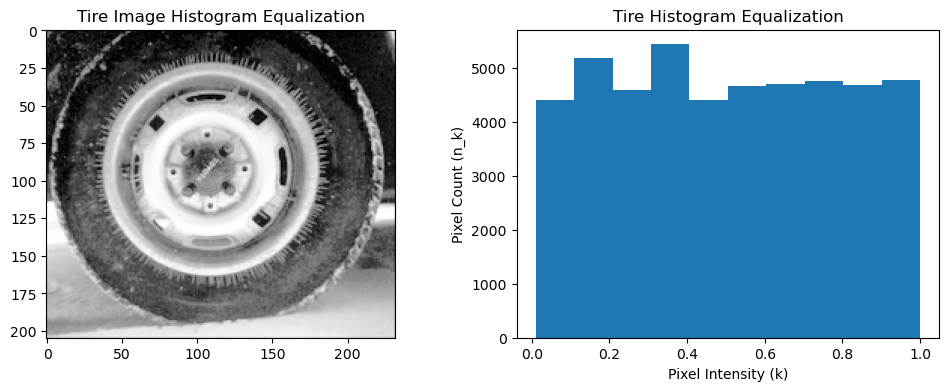

In [147]:
hist_equalizer = skimage.exposure.equalize_hist(tire)
tire_plotting(hist_equalizer, "Tire Image Histogram Equalization", "Tire Histogram Equalization")

12. Describe the appearance of the equalized image.


13. Describe how the histogram looks like in the context of intensity distribution. Why does it look like this? What does each histogram say about each equalized image?